## What will you learn from this project?
* Bivariate data analysis
* Multivariate data analysis
* Seaborn library visualization techniques: bar, box, kde, swarm, heatmap, clustermap
* Ploty library visualization techniques: animated plot on world map

## Introduction
* The world happiness report is a landmark survey of the state of global happiness
* The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. 
* Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. 
* The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

<img src="https://productimages.hepsiburada.net/s/35/550/10488053104690.jpg/format:webp" alt ="Happiness" style='width: 200px;center'>



## Analysis Content
1. [Python Libraries](#1)
2. [Data Content](#2)
3. [Read and Analyse Data](#3)
4. [Data Distributions](#4)
5. [The Hapiest and Most Unhappy Countries in 2021](#5)
6. [Ladder Score Distribution by Regional Indicator](#6)
7. [Ladder score Distribution in Map View](#7)
8. [The Most Generous and Most Ungenerous Countries in 2021](#8)
9. [Generosity Distribution in Map View](#9)
10. [Generosity Distribution by Regional Indicator](#10)
11. [Relationship Between Happiness and Income](#11)
12. [Relationship Between Happiness and Freedom](#12)
13. [Relationship Between Happiness and Preception of Corruption](#13)
14. [Relationship Between Features](#14)

<a id = "1"></a>
## Python Libraries
* In this section, we import the libraries to be used in the kernel

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt;
import seaborn as sns;
sns.set_style("whitegrid"); # To show the graphs with white background and gridded

from plotly.offline import init_notebook_mode, iplot;
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px;
plt.style.use("seaborn-notebook");

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings;
warnings.filterwarnings("ignore");
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-population-19602018/population_total_long.csv
/kaggle/input/world-population-19602018/pop_worldometer_data.csv
/kaggle/input/world-population-19602018/population_above_age_65_percentage_long.csv
/kaggle/input/world-population-19602018/population_female_percentage_long.csv
/kaggle/input/world-population-19602018/population_below_age_14_percentage_long.csv
/kaggle/input/world-population-19602018/population_density_long.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report.csv


<a id = "2"></a>
## Data Content
* The happiness scores and rankings use data from Gallup World Poll.
    * Gallup World Poll: In 2005, Gallup began its World Poll, which continually surveys citizens in 160 countries, representing more than 98% of the world's adult population. The Gallup World Poll consists of more than 100 global questions as well as region-specific items. 
* The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

* **Ladder score:** Happiness score or subjective well-being. This is the national average response to the question of life evaluations.
* **Logged GDP per capita:** The GDP-per-capita time series from 2019 to 2020 using countryspecific forecasts of real GDP growth in 2020.
* **Social support:** Social support refers to assistance or support provided by members of social networks to an individual.
* **Healthy life expectancy:** Healthy life expectancy is the average life in good health - that is to say without irreversible limitation of activity in daily life or incapacities - of a fictitious generation subject to the conditions of mortality and morbidity prevailing that year.
* **Freedom to make life choices:** Freedom to make life choices is the national average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?” ... It is defined as the average of laughter and enjoyment for other waves where the happiness question was not asked
* **Generosity:** Generosity is the residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita.
* **Perceptions of corruption:** The measure is the national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?”
* **Ladder score in Dystopia:** It has values equal to the world’s lowest national averages. Dystopia as a benchmark against which to compare contributions from each of the six factors. Dystopia is an imaginary country that has the world's least-happy people. ... Since life would be very unpleasant in a country with the world's lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom, and least social support, it is referred to as “Dystopia,” in contrast to Utopia
* World Happiness Report Official Website: https://worldhappiness.report/

<a id = "3"></a>
## Read and Analyse Data

In [2]:
# Read Data
df = pd.read_csv("../input/world-happiness-report-2021/world-happiness-report.csv");
df2021 = pd.read_csv("../input/world-happiness-report-2021/world-happiness-report-2021.csv");

In [3]:
# Show first 5 row of data
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [4]:
# Basic statistics
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [5]:
# Info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [6]:
# Show first 5 row of data
df2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [7]:
# Basic statistics
df2021.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [8]:
# Info about data
df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

<a id = "4"></a>
## Data Distribution in 2021
* Unique Countries
* Count Regional Indicator
* Distribution of Remaining Features

In [9]:
# Unique Countries
print(df2021["Country name"].unique());

['Finland' 'Denmark' 'Switzerland' 'Iceland' 'Netherlands' 'Norway'
 'Sweden' 'Luxembourg' 'New Zealand' 'Austria' 'Australia' 'Israel'
 'Germany' 'Canada' 'Ireland' 'Costa Rica' 'United Kingdom'
 'Czech Republic' 'United States' 'Belgium' 'France' 'Bahrain' 'Malta'
 'Taiwan Province of China' 'United Arab Emirates' 'Saudi Arabia' 'Spain'
 'Italy' 'Slovenia' 'Guatemala' 'Uruguay' 'Singapore' 'Kosovo' 'Slovakia'
 'Brazil' 'Mexico' 'Jamaica' 'Lithuania' 'Cyprus' 'Estonia' 'Panama'
 'Uzbekistan' 'Chile' 'Poland' 'Kazakhstan' 'Romania' 'Kuwait' 'Serbia'
 'El Salvador' 'Mauritius' 'Latvia' 'Colombia' 'Hungary' 'Thailand'
 'Nicaragua' 'Japan' 'Argentina' 'Portugal' 'Honduras' 'Croatia'
 'Philippines' 'South Korea' 'Peru' 'Bosnia and Herzegovina' 'Moldova'
 'Ecuador' 'Kyrgyzstan' 'Greece' 'Bolivia' 'Mongolia' 'Paraguay'
 'Montenegro' 'Dominican Republic' 'North Cyprus' 'Belarus' 'Russia'
 'Hong Kong S.A.R. of China' 'Tajikistan' 'Vietnam' 'Libya' 'Malaysia'
 'Indonesia' 'Congo (Brazzaville)' 

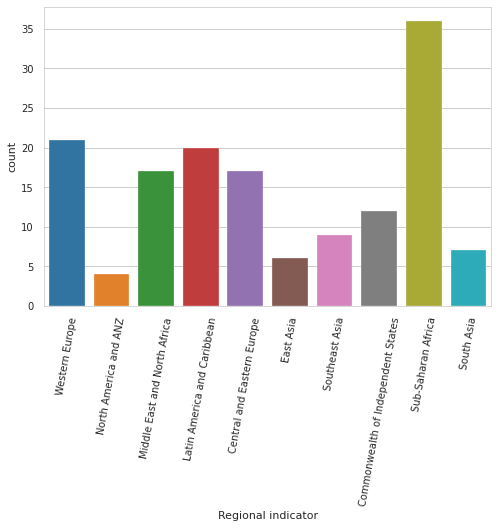

In [10]:
# Count of regional indicators
sns.countplot(df2021["Regional indicator"]);
plt.xticks(rotation = 80);

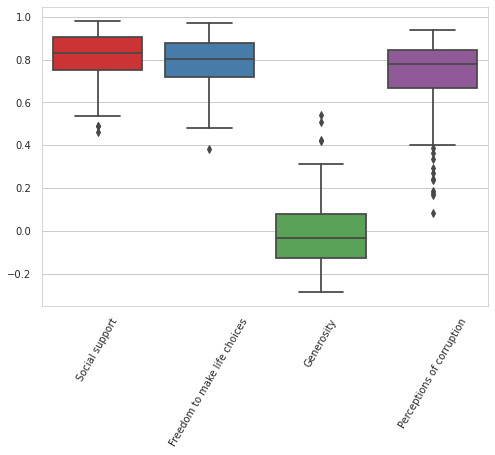

In [11]:
# Distribution of feature set 1
listFeatures = ["Social support", "Freedom to make life choices", "Generosity", "Perceptions of corruption"];
sns.boxplot(data = df2021.loc[:, listFeatures], orient = "v", palette = "Set1");
plt.xticks(rotation = 60);

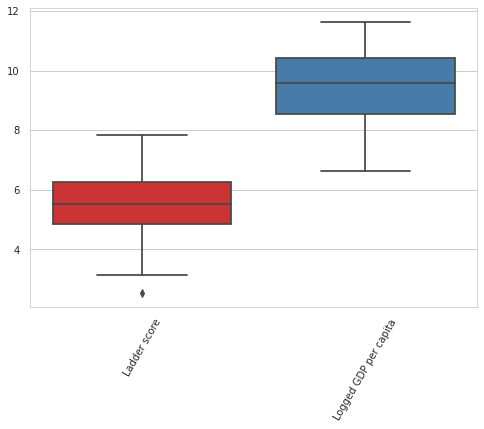

In [12]:
# Distribution of feature set 2
listFeatures = ["Ladder score", "Logged GDP per capita"];
sns.boxplot(data = df2021.loc[:, listFeatures], orient = "v", palette = "Set1");
plt.xticks(rotation = 60);

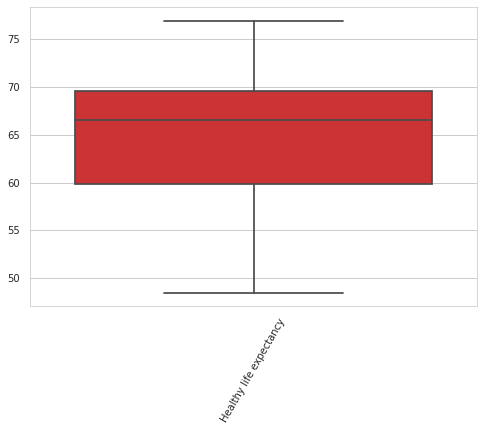

In [13]:
# Distribution of feature set 3
listFeatures = ["Healthy life expectancy"];
sns.boxplot(data = df2021.loc[:, listFeatures], orient = "v", palette = "Set1");
plt.xticks(rotation = 60);

<a id = "5"></a>
## The Hapiest and Most Unhappy Countries in 2021

In [14]:
maxScore = np.max(df2021["Ladder score"]);
minScore = np.min(df2021["Ladder score"]);
theHappiestCountry = df2021[df2021["Ladder score"] == maxScore]["Country name"];
theMostUnhappyCountry = df2021[df2021["Ladder score"] == minScore]["Country name"];

print("The Happiest Country: ", theHappiestCountry.values[0]);
print("The Most Unhappy Country: ", theMostUnhappyCountry.values[0]);

The Happiest Country:  Finland
The Most Unhappy Country:  Afghanistan


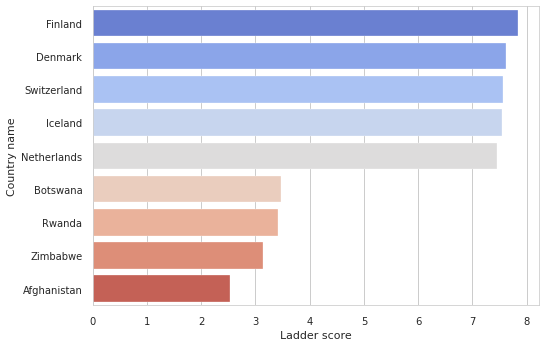

In [15]:
happinessFilter = (df2021.loc[:,"Ladder score"] > 7.4) | (df2021.loc[:, "Ladder score"] < 3.5);
sns.barplot(x = "Ladder score", y = "Country name", data = df2021[happinessFilter], palette = "coolwarm");

<a id = "6"></a>
## Ladder Score Distribution by Regional Indicator

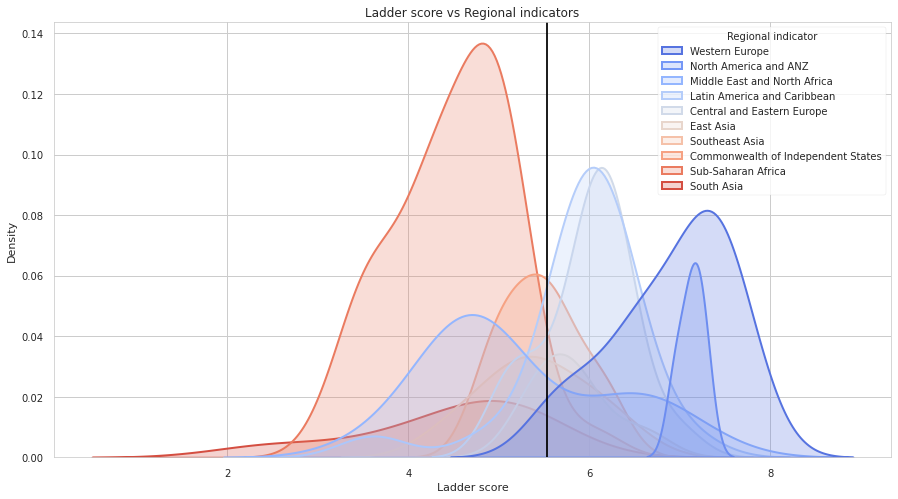

In [16]:
plt.figure(figsize = (15, 8));
sns.kdeplot(df2021["Ladder score"], hue = df2021["Regional indicator"], fill = True, linewidth = 2, palette = "coolwarm");
plt.axvline(df2021["Ladder score"].mean(), c = "black"); # Mean value of Ladder score
plt.title("Ladder score vs Regional indicators");

<a id = "7"></a>
## Ladder score Distribution in Map View

In [17]:
fig = px.choropleth(df.sort_values("year"),
                    locations = "Country name",
                    color = "Life Ladder",
                    locationmode = "country names",
                    animation_frame = "year");
fig.update_layout(title = "Life Ladder Comparison by Countries");
fig.show();

<a id = "8"></a>
## The Most Generous and Most Ungenerous Countries in 2021

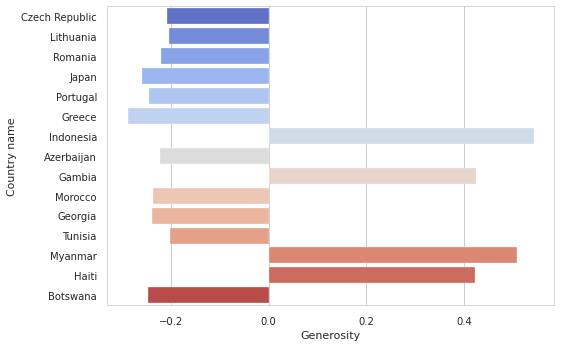

In [18]:
generousityFilter = (df2021.loc[:, "Generosity"] > 0.4) | (df2021.loc[:, "Generosity"] < -0.2);
sns.barplot(x = "Generosity", y = "Country name", data = df2021[generousityFilter], palette = "coolwarm");

<a id = "9"></a>
## Generosity Distribution in Map View

In [19]:
fig = px.choropleth(df.sort_values("year"),
                    locations = "Country name",
                    color = "Generosity",
                    locationmode = "country names",
                    animation_frame = "year");
fig.update_layout(title = "Life Ladder Comparison by Countries");
fig.show();

<a id = "10"></a>
## Generosity Distribution by Regional Indicator

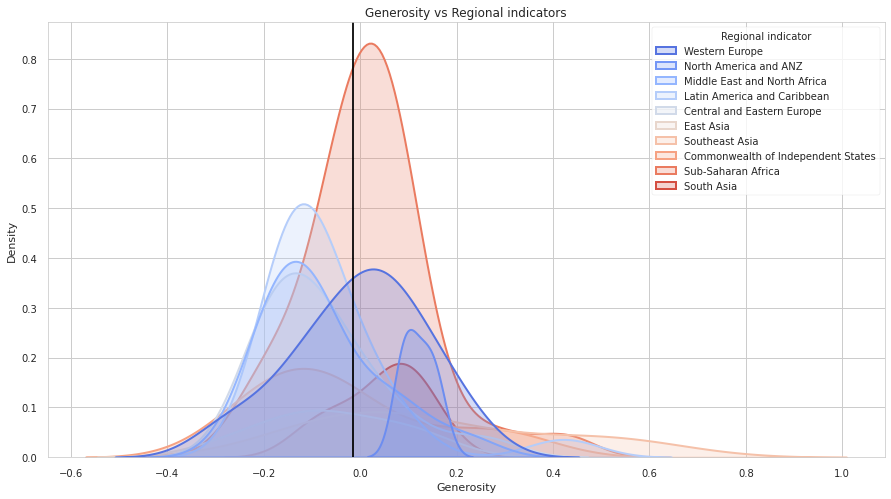

In [20]:
plt.figure(figsize = (15, 8));
sns.kdeplot(df2021["Generosity"], hue = df2021["Regional indicator"], fill = True, linewidth = 2, palette = "coolwarm");
plt.axvline(df2021["Generosity"].mean(), c = "black"); # Mean value of Ladder score
plt.title("Generosity vs Regional indicators");

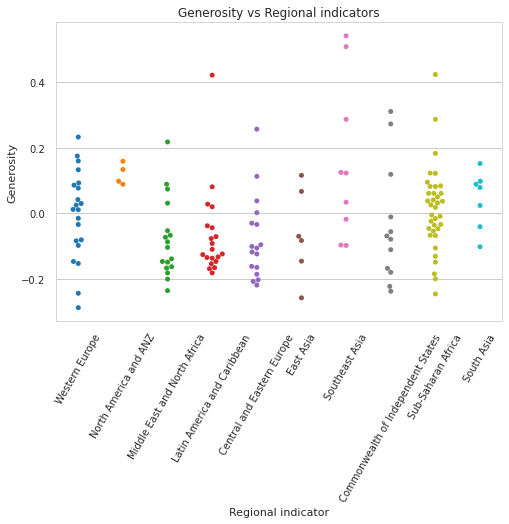

In [21]:
sns.swarmplot(x = "Regional indicator", y = "Generosity", data = df2021);
plt.xticks(rotation = 60);
plt.title("Generosity vs Regional indicators");


<a id = "11"></a>
## Relationship Between Happiness and Income

In [22]:
pop = pd.read_csv("../input/world-population-19602018/population_total_long.csv");
pop.head()

,Country Name,Year,Count
0,Aruba,1960,54211
1,Afghanistan,1960,8996973
2,Angola,1960,5454933
3,Albania,1960,1608800
4,Andorra,1960,13411


In [23]:
pop_df = df.copy();
for i, cnts in enumerate(pop_df["Country name"]):
    region = df2021[df2021["Country name"] == cnts]["Regional indicator"];
    population = pop[(pop["Country Name"] == cnts) & (pop["Year"] == pop_df.loc[i, "year"])]["Count"];
    if len(region) > 0:
        pop_df.loc[i, "Region"] = region.values[0];
    else:
        pop_df.loc[i, "Region"] = "Other";
        
    if len(population) > 0:
        pop_df.loc[i, "Population"] = int(population.values);
    else:
        pop_df.loc[i, "Population"] = 0;        

In [24]:
dropFilter = pop_df[pop_df["Population"] == 0];
pop_df = pop_df.drop(labels = dropFilter.index, axis = 0);

In [25]:
fig = px.scatter(pop_df.sort_values("year"),
                 x = "Log GDP per capita",
                 y = "Life Ladder",
                 animation_frame = "year",
                 animation_group = "Country name",
                 size = "Population",
                 template = "plotly_white",
                 color = "Region",
                 hover_name = "Country name",
                 size_max = 60);

fig.update_layout(title = "Life Ladder and Log GDP per capita Comparison by Countries via Regions for each Year");
fig.show();

<a id = "12"></a>
## Relationship Between Happiness and Freedom

In [26]:
fig = px.scatter(pop_df.sort_values("year"),
                 x = "Freedom to make life choices",
                 y = "Life Ladder",
                 animation_frame = "year",
                 animation_group = "Country name",
                 size = "Population",
                 template = "plotly_dark",
                 color = "Region",
                 hover_name = "Country name",
                 size_max = 60);

fig.update_layout(title = "Life Ladder and Freedom Comparison by Countries via Regions for each Year");
fig.show();

<a id = "13"></a>
## Relationship Between Happiness and Preception of Corruption

In [27]:
fig = px.scatter(pop_df.sort_values("year"),
                 x = "Perceptions of corruption",
                 y = "Life Ladder",
                 animation_frame = "year",
                 animation_group = "Country name",
                 size = "Population",
                 color = "Region",
                 hover_name = "Country name",
                 size_max = 60);

fig.update_layout(title = "Life Ladder and Perception of Corruption Comparison by Countries via Regions for each Year");
fig.show();

<a id = "14"></a>
## Relationship Between Features

In [28]:
df.corr()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,0.035515,0.078246,-0.010093,0.164059,0.222151,-0.043422,-0.081478,-0.003245,0.196869
Life Ladder,0.035515,1.000000,0.790166,0.707806,0.744506,0.528063,0.190632,-0.427245,0.532273,-0.297488
Log GDP per capita,0.078246,0.790166,1.000000,0.692602,0.848049,0.367932,-0.000915,-0.345511,0.302282,-0.210781
Social support,-0.010093,0.707806,0.692602,1.000000,0.616037,0.410402,0.067000,-0.219040,0.432152,-0.395865
Healthy life expectancy at birth,0.164059,0.744506,0.848049,0.616037,1.000000,0.388681,0.020737,-0.322461,0.318247,-0.139477
Freedom to make life choices,0.222151,0.528063,0.367932,0.410402,0.388681,1.000000,0.329300,-0.487883,0.606114,-0.267661
Generosity,-0.043422,0.190632,-0.000915,0.067000,0.020737,0.329300,1.000000,-0.290706,0.358006,-0.092542
Perceptions of corruption,-0.081478,-0.427245,-0.345511,-0.219040,-0.322461,-0.487883,-0.290706,1.000000,-0.296517,0.264225
Positive affect,-0.003245,0.532273,0.302282,0.432152,0.318247,0.606114,0.358006,-0.296517,1.000000,-0.374439
Negative affect,0.196869,-0.297488,-0.210781,-0.395865,-0.139477,-0.267661,-0.092542,0.264225,-0.374439,1.000000


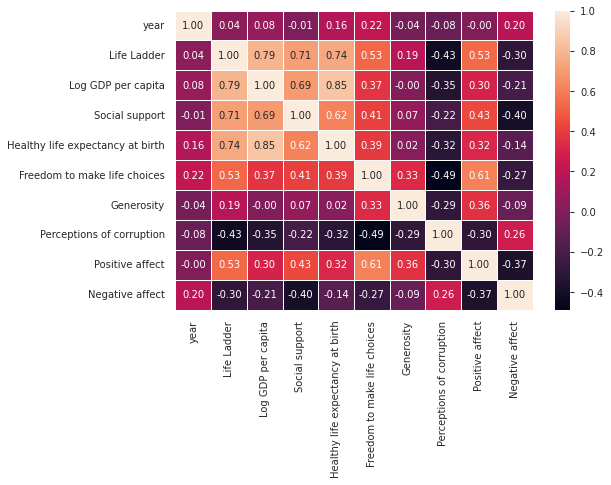

In [29]:
sns.heatmap(df.corr(), annot= True, fmt = ".2f", linewidth = .7);

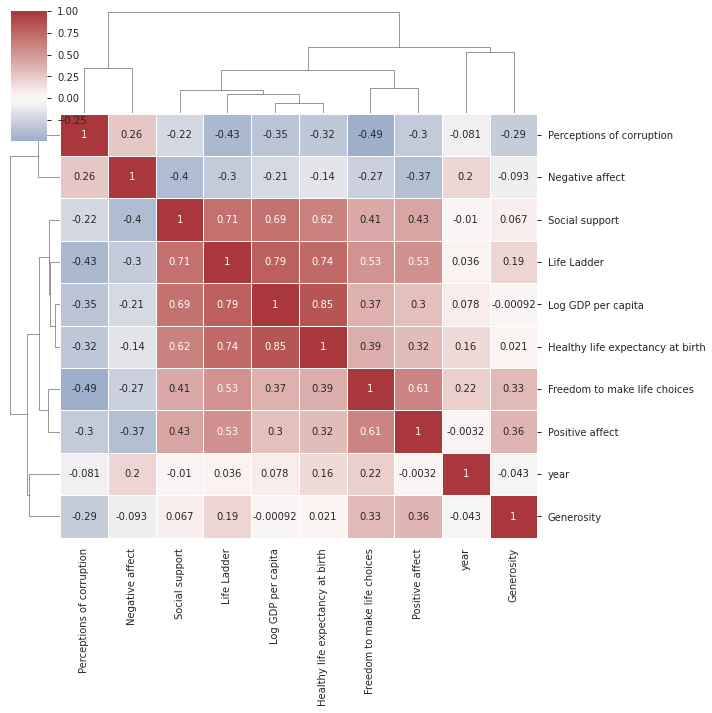

In [30]:
sns.clustermap(df.corr(), center = 0, cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .7, figsize = (10, 10));